In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score,
    roc_auc_score, roc_curve, classification_report
)

In [2]:
# Load and clean data
df = pd.read_csv("/content/data.csv")
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [3]:
# Features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [4]:
# Train/test split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [6]:
# Predict
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

In [7]:
# Evaluate
conf_mat = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



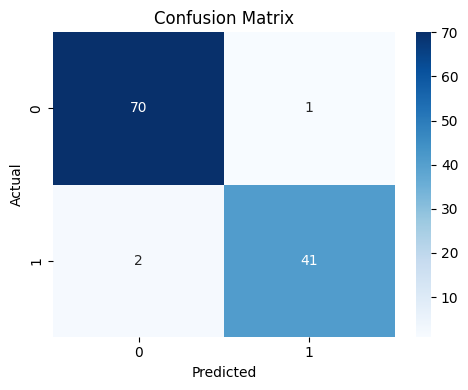

In [8]:
# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


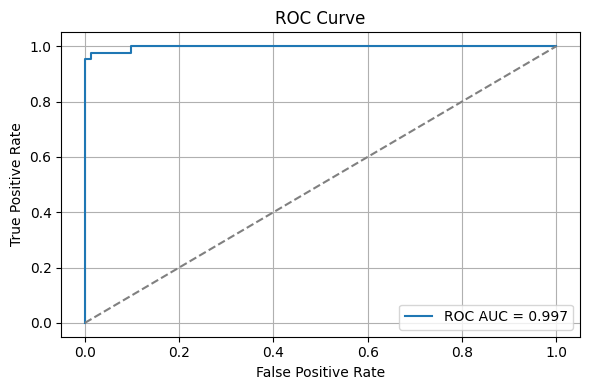

In [9]:

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

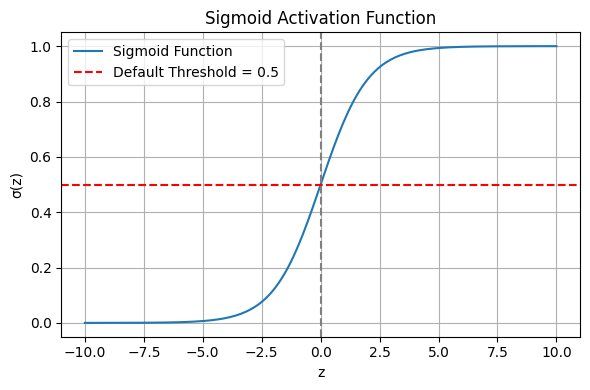

In [11]:
#Plot Sigmoid Function
z = np.linspace(-10, 10, 200)
sigmoid = 1 / (1 + np.exp(-z))
plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid, label='Sigmoid Function')
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0.5, color='red', linestyle='--', label='Default Threshold = 0.5')
plt.title("Sigmoid Activation Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Threshold Tuning & Visualisation
thresholds_to_test = np.arange(0.1, 0.9, 0.05)
precision_list = []
recall_list = []

for thresh in thresholds_to_test:
    custom_pred = (y_proba >= thresh).astype(int)
    precision_list.append(precision_score(y_test, custom_pred))
    recall_list.append(recall_score(y_test, custom_pred))


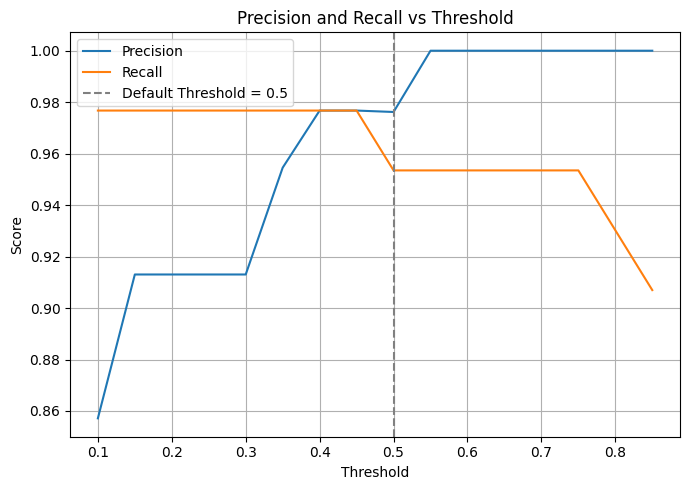

In [13]:
# Plot Precision-Recall vs Threshold
plt.figure(figsize=(7, 5))
plt.plot(thresholds_to_test, precision_list, label='Precision')
plt.plot(thresholds_to_test, recall_list, label='Recall')
plt.axvline(0.5, color='gray', linestyle='--', label='Default Threshold = 0.5')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()